In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
#REPPU
mlat = np.linspace(53.1, 89.7, 30) #30 intervals between 53.1° to 89.7°
mlt= np.linspace(1.6, 357.6, 80) #80 intervals between 1.6° to 357.6°

#AMPERE
#mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

#mlat = np.linspace(0,90,30) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360,80) #24 intervals between 0° to 360°

def calculate_delta(lat1, lon1, lat2, lon2):
    R_E = 6371.0 * 1e3 #meters
    lat1 = 90 - lat1
    lat2 = 90 - lat2

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat1_rad - lat2_rad
    dlon = lon2_rad - lon1_rad

    delta_x = (dlat / 360)*2*np.pi*R_E
    delta_y = (dlon / 360)*2*np.pi*R_E*np.sin(lat1_rad)

    return delta_x, delta_y


In [146]:
#initialize grid
areas = np.zeros((29, 79))
# Loop through latitude and longitude pairs to calculate areas
for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

#divide area values by 1e3
#areas = areas / 1e6
areas

array([[12861333.14563103, 12861333.14563103, 12861333.14563103, ...,
        12861333.14563117, 12861333.14563102, 12861333.14563102],
       [12480923.56395826, 12480923.56395825, 12480923.56395826, ...,
        12480923.56395838, 12480923.56395824, 12480923.56395824],
       [12094458.48137739, 12094458.48137738, 12094458.48137739, ...,
        12094458.48137751, 12094458.48137737, 12094458.48137737],
       ...,
       [ 1526371.25667531,  1526371.25667531,  1526371.25667531, ...,
         1526371.25667533,  1526371.25667531,  1526371.25667531],
       [ 1055402.39393031,  1055402.39393031,  1055402.39393031, ...,
         1055402.39393032,  1055402.39393031,  1055402.39393031],
       [  583921.47050948,   583921.47050948,   583921.47050948, ...,
          583921.47050948,   583921.47050948,   583921.47050948]])

In [3]:
#fig, ax = plt.subplots(figsize=(24, 9))
#sns.heatmap(areas, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Area (m^2)'}, fmt='.0f', annot=True)
#set y ticks labels to be from 90 down to 40
#ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))

In [147]:
def weighted_loss(prediction, target, weights):
    loss = prediction - target #MAE
    weights = weights / 1e6
    weighted_loss = loss * weights
    
    return weighted_loss

target = np.ones((29, 79))
prediction = target + 0.1
weights = areas
weights = np.flipud(weights)

weight_loss = weighted_loss(prediction, target, weights)
#fig, ax = plt.subplots(figsize=(24, 9))
#sns.heatmap(weight_loss, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Loss (MSE)'}, fmt='.0f', annot=True)
#ax.set_yticklabels(np.flip(np.arange(53, 89, 1)))
weight_loss

array([[0.05839215, 0.05839215, 0.05839215, ..., 0.05839215, 0.05839215,
        0.05839215],
       [0.10554024, 0.10554024, 0.10554024, ..., 0.10554024, 0.10554024,
        0.10554024],
       [0.15263713, 0.15263713, 0.15263713, ..., 0.15263713, 0.15263713,
        0.15263713],
       ...,
       [1.20944585, 1.20944585, 1.20944585, ..., 1.20944585, 1.20944585,
        1.20944585],
       [1.24809236, 1.24809236, 1.24809236, ..., 1.24809236, 1.24809236,
        1.24809236],
       [1.28613331, 1.28613331, 1.28613331, ..., 1.28613331, 1.28613331,
        1.28613331]])

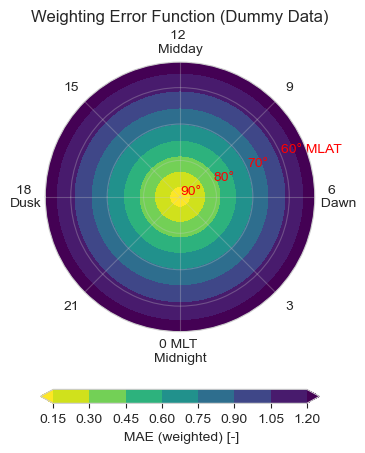

In [149]:
# Define common parameters
theta = np.linspace(0, 360, 79) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(53.1, 89.7, 29)
shrink = .6

# Plot true values
abs_error = weight_loss
abs_error = np.flipud(abs_error) # flip the array upside down

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,5))

c_true = ax.contourf(theta_rad, r, abs_error,  cmap='viridis_r', extend='both', levels=10, zorder=0)
ax.set_ylim([0, 37])
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["90°", "80°", "70°", "60° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
ax.set_title(f'Weighting Error Function (Dummy Data)')
plt.colorbar(c_true, ax=ax, label=' MAE (weighted) [-]', shrink=shrink, pad=0.15, orientation='horizontal')
ax.grid(True, linestyle='-', alpha=0.3)
#plt.tight_layout()
plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/weighted_MAE_REPU.png', dpi=400, bbox_inches='tight')

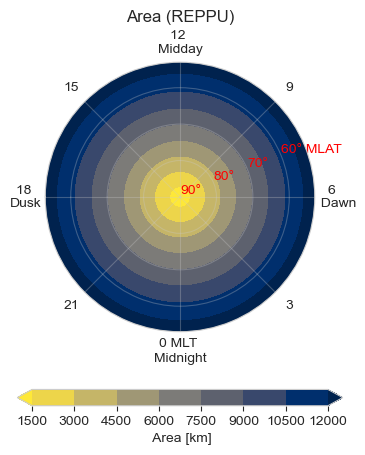

In [154]:
weight_loss
# Define common parameters
theta = np.linspace(0, 360, 79) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(53.1, 89.7, 29)
shrink = .7

# Plot true values
abs_error = areas / 1e3
#abs_error = np.flipud(abs_error) # flip the array upside down

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 5))

c_true = ax.contourf(theta_rad, r, abs_error, cmap='cividis_r', extend='both', levels=10, zorder=0)
ax.set_ylim([0, 37])
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["90°", "80°", "70°", "60° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
ax.set_title(f'Area (REPPU)')
plt.colorbar(c_true, ax=ax, label=' Area [km]', shrink=shrink, pad=0.15, orientation='horizontal')
ax.grid(True, linestyle='-', alpha=0.3)
#plt.tight_layout()
plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/Area_REPU.png',
            dpi=400, bbox_inches='tight')

In [51]:
areas.min()/1000, areas.max()/1000


(17129.687459595796, 21412.592520818784)